In [10]:
# Important necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from __future__ import division
from matplotlib.lines import Line2D
from tqdm import *
from itertools import compress
from scipy.optimize import bisect
%matplotlib inline  

In [11]:
def combine_background_files(folder='../data/bkg_Zj/', lumi=37*1000, nfiles=200, cut=None, kf=1.0):
    """ Read .evt and .meta files as output by monojet.C and 
        properly weigh events
    """
    
    evt_frames = [pd.read_csv(folder+'events_'+str(i)+'.evt', header=0, delimiter=',', skipinitialspace=True) for i in range(nfiles)]
    good_frames = np.array([len(evt_frame) for evt_frame in evt_frames]) > 0
    
    evt_frames = list(compress(evt_frames, good_frames))
    meta_frames = [pd.read_csv(folder+'events_'+str(i)+'.meta', header=0, delimiter=',', skipinitialspace=True) for i in compress(range(nfiles),good_frames)]
    sum_weights = np.sum([meta_frame['sum_weight'] for meta_frame in meta_frames])
    
    for evt_frame, meta_frame in zip(evt_frames, meta_frames):
        evt_frame['weight'] *= (meta_frame['cxn']*lumi/sum_weights)[0]*5000*kf

    data = pd.concat(evt_frames)
    
    if cut is not None:
        data = data.query(cut)
    return data

In [12]:
def to_str(num):
    if .2 <= num <= .9:
        return '{:.1g}'.format(num)[-2:]
    elif num == 0:
        return '0.0'
    elif num == 0.99:
        return '0.99'
    elif num == 1:
        return '1.0'
    else:
        return str(num)

def combine_signal_files(folder='../data/bkg_Zj/', mphi = 1700, rinv = 1, lumi=37*1000, nfiles=4, cut = None,extra='', return_cxn = False):
    """ Read .evt and .meta files as output by monojet.C and 
        properly weigh events
    """
    
    evt_frames = [pd.read_csv(folder+'events_'+str(extra)+str(mphi)+"_"+to_str(rinv)+"_"+str(i)+'.evt', header=0, delimiter=',', skipinitialspace=True) for i in range(nfiles)]
    good_frames = np.array([len(evt_frame) for evt_frame in evt_frames]) > 0
    
    evt_frames = list(compress(evt_frames, good_frames))
    meta_frames = [pd.read_csv(folder+'events_'+str(extra)+str(mphi)+"_"+to_str(rinv)+"_"+str(i)+'.meta', header=0, delimiter=',', skipinitialspace=True) for i in compress(range(nfiles),good_frames)]
    sum_weights = np.sum([meta_frame['sum_weight'] for meta_frame in meta_frames])
    mean_cxn  = np.mean([meta_frame['cxn'] for meta_frame in meta_frames])
    for evt_frame, meta_frame in zip(evt_frames, meta_frames):
        evt_frame['weight'] *= (meta_frame['cxn']*lumi/sum_weights)[0]


        
    data = pd.concat(evt_frames)
    
    if cut is not None:
        data = data.query(cut)
    if return_cxn:
        return data, mean_cxn
    else:
        return data

In [55]:
def get_bkg(bkg, cut=None):
    if cut is not None:
        new_bkg = bkg.query(cut)
    else: 
        new_bkg = bkg
    return np.sum(np.histogram(new_bkg['MEt'].values, weights=new_bkg['weight'].values)[0])

def get_sig(sig, cut=None):
    if cut is not None:
        new_bkg = sig.query(cut)
    else: 
        new_bkg = sig
    return np.sum(np.histogram(new_bkg['MEt'].values, weights=new_bkg['weight'].values)[0])

In [51]:
Zj_df = combine_background_files('../data/bkg_Zj/', nfiles=100, kf=1.1)
Wj_df = combine_background_files('../data/bkg_Wj/', nfiles=100, kf=1.0)
tt_d_df = combine_background_files('../data/bkg_ttbar_dilep//', nfiles=100, kf=1.7)
tt_s_df = combine_background_files('../data/bkg_ttbar_semilep//', nfiles=100, kf=1.7)
QCD_df = combine_background_files('../data/bkg_qcd//', nfiles=100, kf=1.0)

tt_df = pd.concat([tt_d_df, tt_s_df])
ewk_df = pd.concat([Zj_df, Wj_df])

In [52]:
bkgs = [Zj_df, Wj_df, tt_d_df, tt_s_df, QCD_df]

In [31]:
sig, cxns = combine_signal_files("../data/sig_tchannel/////", mphi = 500, rinv = 0.5,nfiles=1, return_cxn=1)

In [89]:
cuts = 'pt1 > 250 & MEt > 800 & pt2 > 0 & pt3 > 0 & pt4 > 0 & pt1 + pt2 + pt3 + pt4 > 0 & dphi < 0.4'

In [90]:
# sig[['pt1','pt2','pt3','pt4']]

In [91]:
get_sig(sig, cuts)/np.sum([get_bkg(bkg, cuts) for bkg in bkgs])

0.44954045531425074

16.10756769766126

In [50]:
len(sig.query(cuts))/len(sig)*100

0.0016045440688028498

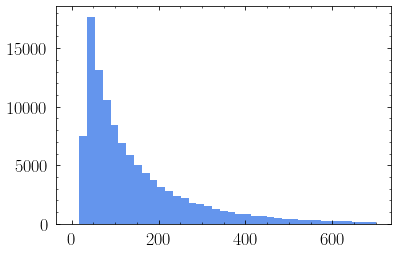

In [30]:
plt.hist(sig['pt2'], bins = np.linspace(0,700,40));

In [147]:
sig, cxns = combine_signal_files("../data/sig_tchannel_direct//////", mphi = 1000, rinv = 0.5,nfiles=1, return_cxn=1)
sig_direct, cxns = combine_signal_files("../data/sig_tchannel_direct//////", mphi = 100000, rinv = 0.5,nfiles=1, return_cxn=1)


sig_chiphi, cxns = combine_signal_files("../data/sig_tchannel_chiphi///////", mphi = 1000, rinv = 0.5,nfiles=1, return_cxn=1)
sig_phiphi, cxns = combine_signal_files("../data/sig_tchannel_phiphi///////", mphi = 1000, rinv = 0.5,nfiles=1, return_cxn=1)

In [139]:
sig, cxns = combine_signal_files("../data/sig_zprime///////", mphi = 1000, rinv = 0.5,nfiles=4, return_cxn=1)

In [140]:
cuts = 'dphi > 2'



In [141]:
np.mean(sig['nj'])

2.772699939867709

In [142]:
np.mean(sig.query(cuts)['nj'])

1.3852703277990635

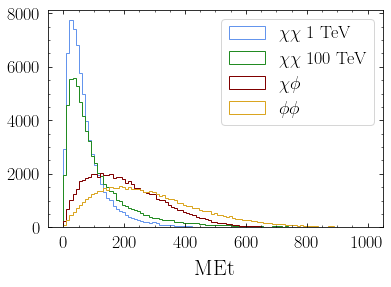

In [152]:
cuts = 'MEt > 0'
plt.hist(sig.query(cuts)['MEt'],bins=np.linspace(0,1000,100),histtype='step', label='$\chi\chi$ 1 TeV');
plt.hist(sig_direct.query(cuts)['MEt'],bins=np.linspace(0,1000,100),histtype='step', label='$\chi\chi$ 100 TeV ');


plt.hist(sig_chiphi.query(cuts)['MEt'],bins=np.linspace(0,1000,100),histtype='step', label='$\chi\phi$');
plt.hist(sig_phiphi.query(cuts)['MEt'],bins=np.linspace(0,1000,100),histtype='step', label='$\phi\phi$');
plt.legend()
plt.xlabel("MEt")

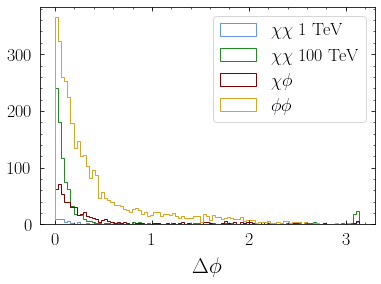

In [148]:
cuts = 'MEt > 600'
plt.hist(sig.query(cuts)['dphi'],bins=np.linspace(0,np.pi,100),histtype='step', label='$\chi\chi$ 1 TeV');
plt.hist(sig_direct.query(cuts)['dphi'],bins=np.linspace(0,np.pi,100),histtype='step', label='$\chi\chi$ 100 TeV ');


plt.hist(sig_chiphi.query(cuts)['dphi'],bins=np.linspace(0,np.pi,100),histtype='step', label='$\chi\phi$');
plt.hist(sig_phiphi.query(cuts)['dphi'],bins=np.linspace(0,np.pi,100),histtype='step', label='$\phi\phi$');
plt.legend()
plt.xlabel("$\Delta\phi$")

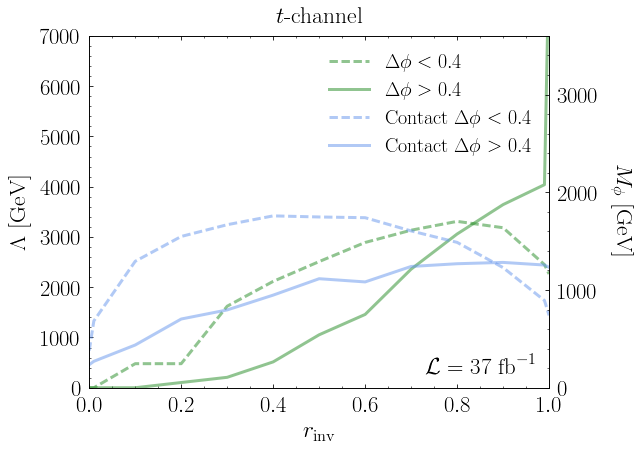

In [231]:
from scipy.optimize import fsolve


fig=plt.figure(figsize=(9,6.4))

title='$t$-channel'

mass_limit_less=np.zeros(len(rinvs))
mass_limit_gtr=np.zeros(len(rinvs))


for i,r in enumerate(rinvs):
    mymass = np.insert(masses,0,0)
    masslist_less = np.insert(result_less[i],0,0)
    masslist_gtr = np.insert(result_gtr[i],0,0)    
    mass_limit_less[i] = fsolve(lambda mZ: 1-np.interp(mZ, mymass, masslist_less), 200)[0]
    mass_limit_gtr[i] = fsolve(lambda mZ: 1-np.interp(mZ, mymass, masslist_gtr), 200)[0]


plt.plot(rinvs,(2)*mass_limit_less, label = r'$\Delta \phi < 0.4$',alpha=.5,lw=3., color='forestgreen', ls='--')
plt.plot(rinvs,(2)*mass_limit_gtr, label = r'$\Delta \phi > 0.4$',alpha=.5,lw=3., color='forestgreen')

plt.plot(rinvs,contact_less, label = r'Contact $\Delta \phi < 0.4$',alpha=.5,lw=3., ls='--', color='cornflowerblue')
plt.plot(rinvs,contact_gtr, label = r'Contact  $\Delta \phi > 0.4$',alpha=.5,lw=3., color='cornflowerblue')


# plt.yscale('log', nonposy='clip')
plt.xlabel(r'$r_{\rm inv}$',fontsize=fs_labels/1.1)
plt.ylabel(r'$\Lambda$ [GeV]',fontsize=fs_labels/1.1)
plt.xlim([0.01,1.0])
# plt.ylim([0, 5000])

plt.title(title, fontsize=fs_labels/1.1)


plt.legend(loc='upper right',
           fontsize=fs_legend/1.1, ncol=1,frameon=False, fancybox=True)

ax = plt.gca()
ttl = ax.title
ttl.set_position([.5, 1.02])

# ticklabels = ["$10^{-3}$","$10^{-2}$","$10^{-1}$","$1$","$10$","$10^2$"]

plt.tick_params(axis='both', which='major', labelsize=fs_ticks/1.1)
# ax.set_yticklabels(ticklabels)

# handles,labels = ax.get_legend_handles_labels()
# handles = [handles[i] for i in [1,3]] + [Line2D([],[],color='k')]  + [Line2D([],[],color='k',ls='--')] #, handles[2]]
# # handles = [Line2D([],[],color=plot_colorss[i]) for i in [1,3,5]] + [Line2D([],[],color='k')] + [Line2D([],[],color='k',ls='--')] #, handles[2]] + 
# labels = [labels[1], labels[3],r'$\Delta \phi > 0.4$',r'$\Delta \phi < 0.4$'] #, labels[2]]

# leg = plt.legend(handles,labels,bbox_to_anchor=(0, 0, 0.97, 0.95),
#            fontsize=20, ncol=2,frameon=False,
#            handletextpad=.5,
#            borderaxespad=0.)

ax.set_ylim(0,7000)

# ax = plt.axes()
# ax.arrow(0.62, 0.8, 0., 0.2, head_width=0.01, head_length=0.1, fc='k', ec='k')
# plt.text(.64,.5,"Exclusion",fontsize=18)


ax = plt.gca()
ttl = ax.title
ttl.set_position([.5, 1.02])


# plt.text(.74,9200-7400, "$M_d = 10$ GeV", fontsize = 19)
# plt.text(.83,8570-7400, "$g_x = 1.0$", fontsize = 19)
# plt.text(.83,7900-7400, "$g_q = 0.1$", fontsize = 19)

# ax = plt.axes()
# ax.arrow(.36,8450, 0., -400, head_width=0.01, head_length=80, fc='k', ec='k')
# # plt.text(.20,7850,"Exclusion",fontsize=17)

# ax2 = ax.twinx()

# ax2.set_ylabel("$M_\phi$ [GeV]", rotation=270,labelpad=35)

# ax2.plot(rinvs, mass_limit_less, ls='--',lw=0)
# ax2.set_ylim(0,2500)

plt.xlim(0.0,1)

# plt.tight_layout()

plt.tick_params(axis='both', which='major', labelsize=fs_ticks/1.1)

ax2 = ax.twinx()

ax2.set_ylabel("$M_{\phi}$ [GeV]", rotation=270,labelpad=35, fontsize=fs_labels/1.1)

ax2.plot(rinvs, mass_limit_less, ls='--',lw=0)
ax2.set_ylim(0,3600)


plt.tick_params(axis='both', which='major', labelsize=fs_ticks/1.1)

plt.text(.73,140,"$\mathcal L = 37~\mathrm{fb}^{-1}$",fontsize=fs_text)

plt.xlim(0.0,1)



# plt.ylim(0,5000)
plt.tight_layout()
plt.savefig("tChannelLims.pdf")





plt.show()



In [120]:
rinvs

[0.0, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.99, 1.0]

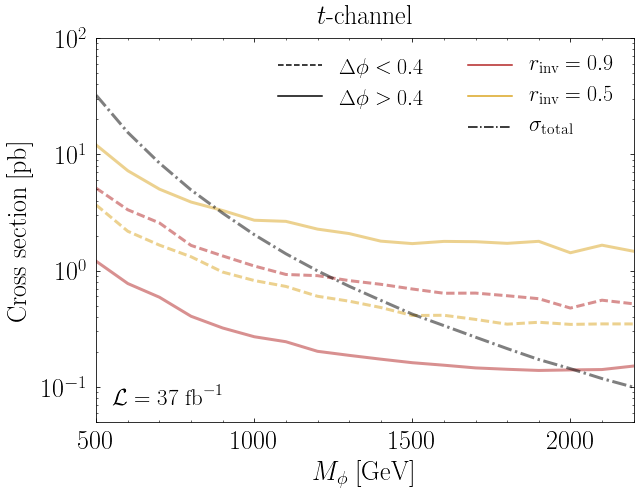

In [157]:
title='$t$-channel'

fig=plt.figure(figsize=(9,7))
plt.yscale('log', nonposy='clip')
plt.xlabel(r'$M_{\phi}$ [GeV]',fontsize=fs_labels)
plt.ylabel(r'$\textrm{Cross~section}\; [{\rm pb}]$',fontsize=fs_labels)  

# dijet=[ 0.91717632,  0.61706362,  0.46679191,  0.36953898,  0.32240986,  0.26982623,
#   0.22844323,  0.19783447,  0.17063068,  0.1498608,   0.1374028,   0.12254047,
#   0.10766884,  0.09746458,  0.08906787,  0.0794822,   0.07430999,  0.06567338,
#   0.05980109,  0.05777339,  0.05254686,  0.04881059,  0.0468448,   0.04493089,
#   0.04311289,  0.04064162,  0.03722523,  0.03508797,  0.03416082,  0.033527,
#   0.03310013]

plt.plot(masses,cxns[:,-2]*result_less[-2,:],c='firebrick',alpha=.5 ,lw=3, ls='--')
plt.plot(masses,cxns[:,-2]*result_gtr[-2,:],c='firebrick',alpha=.5, lw=3, ls='-')


plt.plot(masses,cxns[:,6]*result_less[6,:],c='goldenrod',alpha=.5 ,lw=3, ls='--')
plt.plot(masses,cxns[:,6]*result_gtr[6,:],c='goldenrod',alpha=.5, lw=3, ls='-')


plt.plot(masses,cxns[:,10],
         c='k',ls='-.',alpha=.5, lw=3, label="$\sigma_\mathrm{total}$")



plt.title(title, fontsize=fs_labels)


ax = plt.gca()
ttl = ax.title
ttl.set_position([.5, 1.02])



plt.xlim([500,2200])
plt.ylim([5*1e-2,100])

handles,labels = ax.get_legend_handles_labels()
labels = ["$\Delta\phi < 0.4$","$\Delta\phi > 0.4$","","$r_\mathrm{inv}=0.9$","$r_\mathrm{inv}=0.5$","$\sigma_\mathrm{total}$"]
handles = [Line2D([],[],color='k',ls='--')] + [Line2D([],[],color='k',ls='-')] +[Line2D([],[],alpha=0)]+[Line2D([],[],color='firebrick',ls='-')]+ [Line2D([],[],color='goldenrod',ls='-')] + [Line2D([],[],alpha=1, color='black',ls='-.')] + [Line2D([],[],color=plot_colors[i]) for i in range(3)] 

plt.legend(handles, labels, loc='upper right',
           fontsize=fs_legend, ncol=2
           ,frameon=False, fancybox=True)

plt.tick_params(axis='both', which='major', labelsize=fs_labels)


plt.yscale('log')

plt.text(550,.07,"$\mathcal L = 37~\mathrm{fb}^{-1}$",fontsize=fs_text)
# plt.text(3200,0.18, "$M_d = 10$ GeV", fontsize = 21)
# plt.text(1070,3.4*10**-3, "$g_x = 1.0$", fontsize = 21)
# plt.text(1070,1.7*10**-3, "$g_q = 0.1$", fontsize = 21)

plt.tight_layout()
plt.savefig("tChannel_cxn.pdf")




# s-channel limits

In [528]:
rinvs = [0.0, 0.01,0.1,.2,.3,.4,.5,.6,.7,.8,.9, 0.99, 1.0]

In [956]:
# mass_lims_schannel = [    0.      ,     980.56156249 , 3327.41646839 , 3672.88945312 , 3751.77360285,
#   3623.8715439   , 3386.04270153 , 2937.37777449 , 2402.56258518  , 999.97841573,
#      0.    ,         0.        ,     0.        ]

mass_lims_schannel = [    0.,           380.36845131,  2301.97268068,  2727.84309789,  2758.51509539,
  2713.64559739,  2523.2249279,   2203.93694894,  1661.83490573,  1111.73572584,
     0. ,            0.         ,    0.        ]

mass_lims_schannel = [    0.  ,         333.76364598  ,2148.68546278  ,2516.79386298  ,2665.67456151,
  2543.5315253  , 2370.81840128  ,2077.12389912  ,1619.60743569,  1077.85734717,
     0.         ,    0.           ,  0.        ]


mass_lims_schannel = [    0.      ,     362.73515126 , 2217.25069976 , 2672.0204896   ,2728.9490603,
  2652.48424035 , 2474.73776734 , 2157.22562032 , 1645.85617429 , 1100.64541195,
     0.         ,    0.          ,   0.        ]


In [957]:
# mass_lims_dijets_schannel = [ 3088.10052123 , 3028.37356425 , 2663.24622078 , 22536299935  ,1887.8149791,
#   1480.83838644  ,   0.      ,       0. ,            0.        ,     0.      ,       0.,
#      0.       ,      0.        ]

mass_lims_dijets_schannel=[ 1935.63677909,  1909.48574306,  1660.40287658,  1395.13922946,   675.31258973,
     0.,             0.    ,         0. ,            0. ,            0.   ,          0.
,     0.  ,           0.        ]



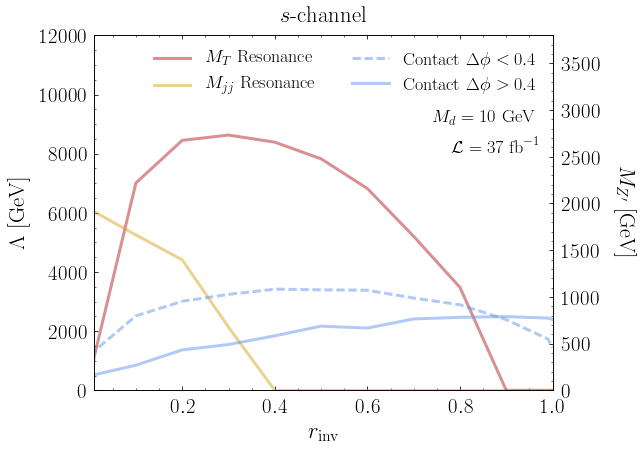

In [960]:
from scipy.optimize import fsolve
fig=plt.figure(figsize=(9,6.4))
title='$s$-channel'

# mass_limit_less=np.zeros(len(rinvs))
# mass_limit_gtr=np.zeros(len(rinvs))


# for i,r in enumerate(rinvs):
#     mymass = np.insert(masses,0,0)
#     masslist_less = np.insert(result_less[i],0,0)
#     masslist_gtr = np.insert(result_gtr[i],0,0)    
#     mass_limit_less[i] = fsolve(lambda mZ: 1-np.interp(mZ, mymass, masslist_less), 2.)[0]
#     mass_limit_gtr[i] = fsolve(lambda mZ: 1-np.interp(mZ, mymass, masslist_gtr), 2.)[0]


# final_limit=mass_limit
# print(mass_limit)


# final_limit[0]=0
# final_limit[1]=0
# cutoff = final_limit/np.sqrt(.1)
plt.plot(rinvs,mass_lims_schannel/np.sqrt(0.1), label = r'$M_T$ Resonance',alpha=.5,lw=3, color='firebrick', ls='-')
plt.plot(rinvs,mass_lims_dijets_schannel/np.sqrt(0.1), label = r'$M_{jj}$ Resonance',alpha=.5,lw=3, color='goldenrod', ls='-')


# plt.plot(rinvs,mass_lims_schannel/np.sqrt(0.1), label = r'$\Delta \phi > 0.4$',alpha=.5,lw=2.5, color='firebrick')

plt.plot(rinvs,contact_less, label = r'Contact $\Delta \phi < 0.4$',alpha=.5,lw=3, ls='--', color='cornflowerblue')
plt.plot(rinvs,contact_gtr, label = r'Contact  $\Delta \phi > 0.4$',alpha=.5,lw=3, color='cornflowerblue')


# plt.yscale('log', nonposy='clip')
plt.xlabel(r'$r_{\rm inv}$',fontsize=fs_labels/1.15)
plt.ylabel(r'$\Lambda$ [GeV]',fontsize=fs_labels/1.15)
plt.xlim([0.01,1.0])
# plt.ylim([0, 5000])

plt.title(title, fontsize=fs_labels/1.15)


plt.legend(loc='upper right',
           fontsize=20/1.1, ncol=2,frameon=False, fancybox=True)

ax = plt.gca()
ttl = ax.title
ttl.set_position([.5, 1.02])

# ticklabels = ["$10^{-3}$","$10^{-2}$","$10^{-1}$","$1$","$10$","$10^2$"]

plt.tick_params(axis='both', which='major', labelsize=fs_ticks/1.2)
# ax.set_yticklabels(ticklabels)

# handles,labels = ax.get_legend_handles_labels()
# handles = [handles[i] for i in [1,3]] + [Line2D([],[],color='k')]  + [Line2D([],[],color='k',ls='--')] #, handles[2]]
# # handles = [Line2D([],[],color=plot_colorss[i]) for i in [1,3,5]] + [Line2D([],[],color='k')] + [Line2D([],[],color='k',ls='--')] #, handles[2]] + 
# labels = [labels[1], labels[3],r'$\Delta \phi > 0.4$',r'$\Delta \phi < 0.4$'] #, labels[2]]

# leg = plt.legend(handles,labels,bbox_to_anchor=(0, 0, 0.97, 0.95),
#            fontsize=20, ncol=2,frameon=False,
#            handletextpad=.5,
#            borderaxespad=0.)

ax.set_ylim(0,12000)

# ax = plt.axes()
# ax.arrow(0.62, 0.8, 0., 0.2, head_width=0.01, head_length=0.1, fc='k', ec='k')
# plt.text(.64,.5,"Exclusion",fontsize=18)


ax = plt.gca()
ttl = ax.title
ttl.set_position([.5, 1.02])


plt.text(.78,9200-1200, "$\mathcal L = 37~\mathrm{fb}^{-1}$", fontsize = 21/1.15)
plt.text(.74,9000, "$M_d = 10$ GeV", fontsize = 21/1.15)


# plt.text(.81,8370-2400, "$g_x = 1.0$", fontsize = 19)
# plt.text(.81,7550-2400, "$g_q = 0.1$", fontsize = 19)

ax = plt.axes()
# ax.arrow(.36,8450, 0., -400, head_width=0.01, head_length=80, fc='k', ec='k')
# plt.text(.20,7850,"Exclusion",fontsize=17)

ax2 = ax.twinx()

ax2.set_ylabel("$M_{Z'}$ [GeV]", rotation=270,labelpad=35, fontsize=fs_labels/1.2)

ax2.plot(rinvs, mass_lims_schannel, ls='--',lw=0)
ax2.set_ylim(0,3800)

plt.xlim(0.01,1)

plt.tight_layout()

plt.tick_params(axis='both', which='major', labelsize=fs_ticks/1.2)

# plt.ylim(0,3000)
plt.tight_layout()
# plt.savefig("sChannelLims_Tim.pdf")

plt.savefig("sChannelLims.pdf")
# plt.savefig("sChannelLims_Tim.pdf")



plt.show()




In [8]:
import os
masses_rename = list(np.arange(500,3500,500))+[5000,10000]
rinvs_rename = [0.0, 0.01,0.1,.2,.3,.4,.5,.6,.7,.8,.9, 0.99, 1.0]

base_dir = "/group/hepheno/smsharma/Dark-Showers/data/sig_tchannel/hepmc/"

for mass in tqdm(masses_rename):
    for rinv in tqdm(rinvs_rename):
        for inum in range(3):
            os.system("mv " + base_dir + "events_hepmc_M" + str(mass) + "_rinv" + to_str(rinv) +"_"+str(inum) + " " + base_dir +"/events_hepmc_M" + str(mass) + "_rinv" + str(rinv) +"_"+str(inum)+".hepmc")

100%|██████████| 8/8 [00:03<00:00,  2.52it/s]


# Number of dark hadrons

In [434]:
lambdaa = 0.01
Nc=2
NFf=2
NBf=0

b = 11./3 *Nc - 1./6. * NBf - 2./3. * NFf

def alphad(lambdaa):
    return 2*np.pi / (b*np.log(1000/lambdaa))

In [435]:
alphad(100)

0.45479211794728036

In [436]:
alphad(10)

0.22739605897364018

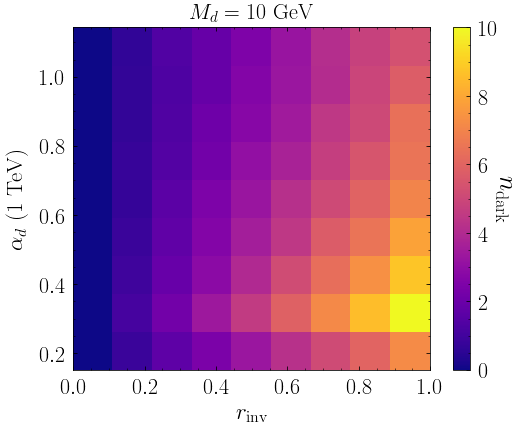

In [437]:
lambda_range = np.linspace(1, 400, 10)
rinv_range = np.linspace(0,1,10)
nmeson = np.zeros((len(lambda_range),len(rinv_range)))

for ilambda, lambdo in enumerate(lambda_range):
    for irinv,rinv in enumerate(rinv_range):
        nmeson[ilambda,irinv] =np.mean(pd.read_csv("../gen/out_" + str(lambdo) + "_"+ str(rinv)[:5]+".evt", header=0, delimiter=',', skipinitialspace=True)['n_meson'])
#         print nmeson[irinv, ilambda] 
# fig=plt.figure(figsize=(8,6.3))
fig, ax = plt.subplots(figsize=(8,6.3))
a = np.nan_to_num(nmeson[:-1, :-1])
N = 10
Y, X = np.mgrid[alphad(1):alphad(400):complex(0, N), 0:1:complex(0, N)]


plt.pcolor(X, Y,a/2,cmap='plasma', vmin=0, vmax=10)
plt.xlabel("$r_\mathrm{inv}$", fontsize=23)
plt.ylabel("$\\alpha_d$ (1 TeV)", fontsize=23)
cbar = plt.colorbar()
axis = plt.gca()
# axis.set_aspect('equal') # X scale matches Y scale
# plt.text( .8, .22,"fds", fontsize=22)
plt.title("$M_d = 10$ GeV", fontsize=22)
plt.tick_params(axis='both', which='major', labelsize=22)
cbar.ax.tick_params(labelsize=22) 
cbar.set_label(label="$n_\mathrm{dark}$", fontsize=26, rotation=270, labelpad = 15)
plt.savefig("ndmesons_md10.pdf")
plt.show()





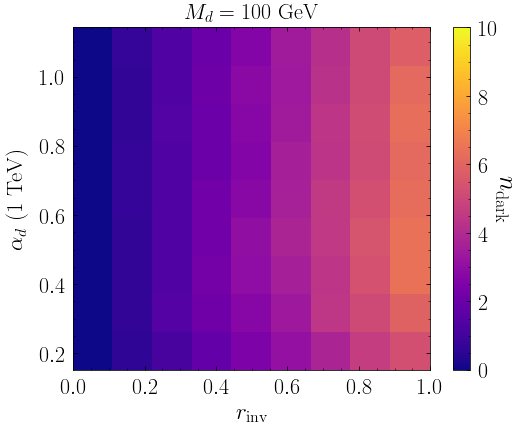

In [438]:
lambda_range = np.linspace(1, 400, 10)
rinv_range = np.linspace(0,1,10)
nmeson = np.zeros((len(lambda_range),len(rinv_range)))

for ilambda, lambdo in enumerate(lambda_range):
    for irinv,rinv in enumerate(rinv_range):
        nmeson[ilambda,irinv] =np.mean(pd.read_csv("../gen/out_100_" + str(lambdo) + "_"+ str(rinv)[:5]+".evt", header=0, delimiter=',', skipinitialspace=True)['n_meson'])
#         print nmeson[irinv, ilambda] 
# fig=plt.figure(figsize=(8,6.3))
fig, ax = plt.subplots(figsize=(8,6.3))
a = np.nan_to_num(nmeson[:-1, :-1])
N = 10
Y, X = np.mgrid[alphad(1):alphad(400):complex(0, N), 0:1:complex(0, N)]


plt.pcolor(X, Y,a/2,cmap='plasma', vmin=0, vmax=10)
plt.xlabel("$r_\mathrm{inv}$", fontsize=23)
plt.ylabel("$\\alpha_d$ (1 TeV)", fontsize=23)
cbar = plt.colorbar()
axis = plt.gca()
# axis.set_aspect('equal') # X scale matches Y scale
# plt.text( .8, .22,"fds", fontsize=22)
plt.title("$M_d = 100$ GeV", fontsize=22)
plt.tick_params(axis='both', which='major', labelsize=22)
cbar.ax.tick_params(labelsize=22) 
cbar.set_label(label="$n_\mathrm{dark}$", fontsize=26, rotation=270, labelpad = 15)
plt.savefig("ndmesons_md100.pdf")
plt.show()




